### 머신러닝의 원리 : 선형 모델
- X로부터 Y를 알고 싶다.
X : [1, 2, 4], Y : [2, 4, 8], x = [5], Y = [10] ? <BR>
선형 모델로 X와 Y의 관계를 설명해 보자.<BR>
Y = ~ Y_hat = w * x + b (~ : 이 표시는 비슷하다는 의미) <BR>
.fit : w 와 b 를 오차가 작아지도록 키우거나 줄여서 조절한다. <BR>
    값을 조절해도 오차가 줄어들지 않는 단계에서 확정 : 수렴

In [4]:
import mglearn

w[0]: 0.393906  b: -0.031804


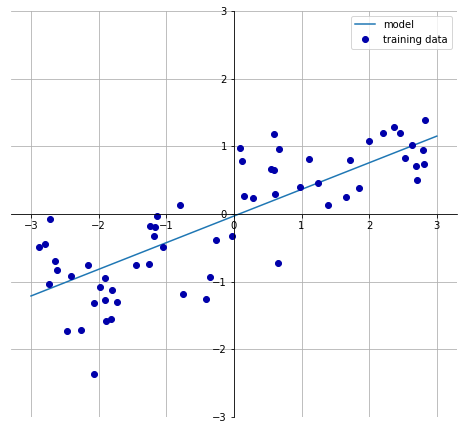

In [5]:
mglearn.plots.plot_linear_regression_wave() # mglearn 에 포함되어 있는 wave 라는 데이터셋에 대한 선형그래프

- 1차원(vector) 데이터 : 점(scalar)으로 분리
- 2차원(matrix) 데이터 : 선으로 분리
- 3차원(tensor, cube) 데이터 : 면(plane)으로 분리
- 4차원(tensor) 데이터 : 공간으로 분리
* 면 이상의 차원은 초평면(hyperplane)

### p73 선형 회귀 모델
- 데이터를 선형 함수로 모델링
- 최소제곱법 : 평균제곱오차를 최소화하는 파라미터를 찾는다.
  * 파라미터를 줄이거나 늘려 본다(기본 원리)(실제는 안 씀)
  * 오차를 파라미터로 미분한 값이 활용 파라미터 값을 조절: 양수(파라미터 증가 시킴), 음수(파라미터를 감소 시킴)
  * 정규방정식으로 찾기(데이터가 많아지면 메모리 부족 발생)
- 평균제곱오차 : 오차(예측과 정답의 차이)를 제곱 > 모든 샘플들의 오창를 평균 > 0 에 가까워지도록.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# 사람의 키와 몸무게를 활용하여 몸무게로 부터 키를 예측해 보자.
몸무게 = [30, 60, 70, 90]
키 = [120, 160, 170, 190]
테스트 = [65, 80]

In [15]:
몸무게 = np.array(몸무게).reshape((-1, 1))
키 = np.array(키).reshape((-1, 1))
테스트 = np.array(테스트).reshape((-1, 1))

In [16]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X=몸무게, y=키) # Y = w * x + b

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
테스트, lr.predict(테스트)

(array([[65],
        [80]]), array([[162.93333333],
        [180.53333333]]))

In [22]:
lr.score(몸무게, 키)

0.9928205128205129

In [23]:
# 계수(w)와 절편(b)
lr.coef_, lr.intercept_

(array([[1.17333333]]), array([86.66666667]))

In [24]:
lr.coef_ * 몸무게 + lr.intercept_

array([[121.86666667],
       [157.06666667],
       [168.8       ],
       [192.26666667]])

In [25]:
키

array([[120],
       [160],
       [170],
       [190]])

### 선형 회귀 : 코스피 200 

In [78]:
df = pd.read_html('코스피200 _ 다음 금융.html', encoding='cp949', index_col=0)
len(df)

3

In [138]:
df[1]

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.84,▼0.43,-0.16%,22559,825303,318,84,-382
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557
19.06.25,275.28,▼0.30,-0.11%,60506,2635188,-364,277,-12
19.06.24,275.58,▲0.10,+0.04%,55539,2235175,-978,-1048,1966
19.06.21,275.48,▼0.53,-0.19%,77279,3275700,538,206,-767
19.06.20,276.01,▲0.70,+0.25%,55336,2417864,-1342,-434,1762


In [139]:
# 전일비, 등락률의 특수문자를 삭제하고 실수로 변환한다.
days = df[1].replace('▼', '-', regex=True).replace('▲', '', regex=True).replace('%', '', regex=True)
days['전일비'] = days['전일비'].astype('float32')
days['등락률'] = days['등락률'].astype('float32')
days.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 19.07.02 to 19.06.19
Data columns (total 8 columns):
종가        10 non-null float64
전일비       10 non-null float32
등락률       10 non-null float32
거래량       10 non-null int64
거래대금      10 non-null int64
개인(억)     10 non-null int64
외국인(억)    10 non-null int64
기관(억)     10 non-null int64
dtypes: float32(2), float64(1), int64(5)
memory usage: 640.0+ bytes


In [140]:
# min, max 정규화 [0, 1]
minimum = np.min(days, axis = 0)
maximum = np.max(days, axis = 0)
day_norm = (days - minimum) / (maximum - minimum)

In [141]:
X = day_norm.iloc[2:]
y = day_norm['종가'].iloc[1:-1]
X.shape, y.shape

((8, 8), (8,))

In [142]:
X

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.06.28,0.898785,0.062500,0.060606,0.823081,0.783846,0.528986,1.000000,0.000000
19.06.27,1.000000,0.613839,0.606061,0.799415,0.966276,0.053341,0.710766,1.000000
19.06.26,0.101215,0.174107,0.169697,0.662628,0.691112,0.748390,0.296871,0.484462
19.06.25,0.000000,0.051339,0.048485,0.693476,0.690599,0.818438,0.326435,0.326582
19.06.24,0.121457,0.140625,0.139394,0.602705,0.537966,0.694847,0.000000,0.875416
19.06.21,0.080972,0.000000,0.000000,1.000000,0.935000,1.000000,0.308943,0.117092
19.06.20,0.295547,0.274554,0.266667,0.598995,0.607675,0.621578,0.151269,0.818812
19.06.19,0.012146,1.000000,1.000000,0.862098,0.881008,0.000000,0.966741,0.775527


In [143]:
y

일자
19.07.01    0.805668
19.06.28    0.898785
19.06.27    1.000000
19.06.26    0.101215
19.06.25    0.000000
19.06.24    0.121457
19.06.21    0.080972
19.06.20    0.295547
Name: 종가, dtype: float64

In [144]:
offset = 2
X_train = X.iloc[offset:]
X_test = X.iloc[:offset]
y_train = y.iloc[offset:]
y_test = y.iloc[:offset]
X_train, X_test, y_train, y_test

(                종가       전일비       등락률       거래량      거래대금     개인(억)  \
 일자                                                                     
 19.06.26  0.101215  0.174107  0.169697  0.662628  0.691112  0.748390   
 19.06.25  0.000000  0.051339  0.048485  0.693476  0.690599  0.818438   
 19.06.24  0.121457  0.140625  0.139394  0.602705  0.537966  0.694847   
 19.06.21  0.080972  0.000000  0.000000  1.000000  0.935000  1.000000   
 19.06.20  0.295547  0.274554  0.266667  0.598995  0.607675  0.621578   
 19.06.19  0.012146  1.000000  1.000000  0.862098  0.881008  0.000000   
 
             외국인(억)     기관(억)  
 일자                            
 19.06.26  0.296871  0.484462  
 19.06.25  0.326435  0.326582  
 19.06.24  0.000000  0.875416  
 19.06.21  0.308943  0.117092  
 19.06.20  0.151269  0.818812  
 19.06.19  0.966741  0.775527  ,
                 종가       전일비       등락률       거래량      거래대금     개인(억)  \
 일자                                                                     
 19.06.28  

In [150]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [151]:
lr.predict(X_test), y_test

(array([-14.09758098, -10.26231861]), 일자
 19.07.01    0.805668
 19.06.28    0.898785
 Name: 종가, dtype: float64)

In [152]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(1.0, -79962.786753168)

In [153]:
lr.coef_, lr.intercept_

(array([ -6.16695713,   9.76040648,  10.05739704, -11.88816193,
          6.94418881,  16.41892568,  -5.67926581,  -1.78894349]),
 -8.438731580310467)

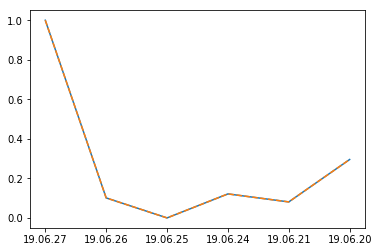

In [154]:
plt.plot(lr.predict(X_train))
plt.plot(y_train, '--')
plt.show()

### p78 리지 회귀 : w 를 가능한한 작제 만드는 Linear Regression
- w 를 규제해 y 를 예측하는데 가능한한 모든 특성을 반영하고자 한다.
- 규제(reqularization)를 통해 Overfitting 되지 않게 한다.
- 규제 종류 : 오차에 L1(abs)(Lasso), L2(square(w))(Lidge) 를 적용하여 w 값을 규제한다.
- Linear Regression 보다는 Ridge 를 활용

In [124]:
from sklearn.linear_model import Ridge # L2 규제를 함

In [155]:
lr = Ridge()
lr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [156]:
lr.predict(X_test), y_test

(array([0.3253865, 0.2640383]), 일자
 19.07.01    0.805668
 19.06.28    0.898785
 Name: 종가, dtype: float64)

In [157]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.03926933145958922, -145.138871738332)

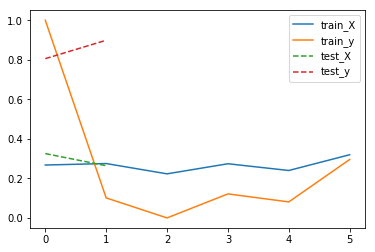

In [158]:
plt.plot(lr.predict(X_train), label='train_X')
plt.plot(y_train.values, label='train_y')
plt.plot(lr.predict(X_test), '--', label='test_X')
plt.plot(y_test.values, '--', label='test_y')
plt.legend()
plt.show()

In [164]:
from sklearn.linear_model import Lasso # L1 규제를 함, 몇가지 특징만을 이용하여 y 를 예측하고 싶을 때

In [160]:
lr = Ridge()
lr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [161]:
lr.predict(X_test), y_test

(array([0.3253865, 0.2640383]), 일자
 19.07.01    0.805668
 19.06.28    0.898785
 Name: 종가, dtype: float64)

In [162]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.03926933145958922, -145.138871738332)

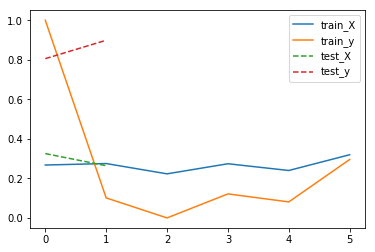

In [163]:
plt.plot(lr.predict(X_train), label='train_X')
plt.plot(y_train.values, label='train_y')
plt.plot(lr.predict(X_test), '--', label='test_X')
plt.plot(y_test.values, '--', label='test_y')
plt.legend()
plt.show()